In [46]:
from diff_simple import build_diffusion
from nn import Diffusion

checkpoint = "models/32_size_big_final.ckpt"
model = Diffusion.load_from_checkpoint(
    checkpoint, diffusion_model=build_diffusion(dim_mults=(1, 2, 2, 2, 2))
)


In [49]:
diff = model.model.cuda()
samples = diff.sample(batch_size=8)

sampling loop time step: 100%|██████████| 1000/1000 [00:15<00:00, 65.81it/s]


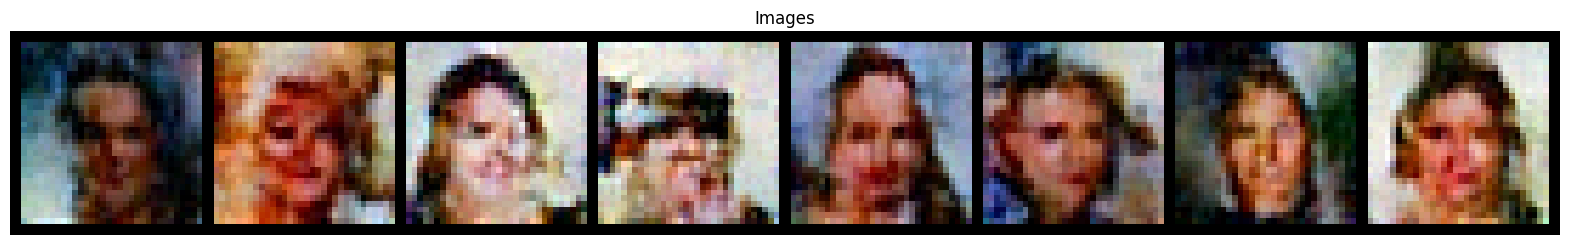

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

def show_imgs(samples):
    plt.figure(figsize=(20, 20))
    plt.axis(False)
    plt.title("Images")
    plt.imshow(np.transpose(vutils.make_grid(samples.cuda(), padding=2, normalize=True).cpu(), (1, 2, 0)))

show_imgs(samples)

In [55]:
from torchvision import transforms

from dataset import LightingDataModule, get_celeba_module

IMG_SIZE = 32

transform = transforms.Compose(
    [
        transforms.Resize(size=IMG_SIZE),
        transforms.CenterCrop(size=IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

dataset: LightingDataModule = get_celeba_module(
    transform=transform,
    subset_train=8,
    subset_test=0,
    num_workers=16,
    batch_size=8,
)

Files already downloaded and verified
Files already downloaded and verified
getting subset
getting subset
8
0


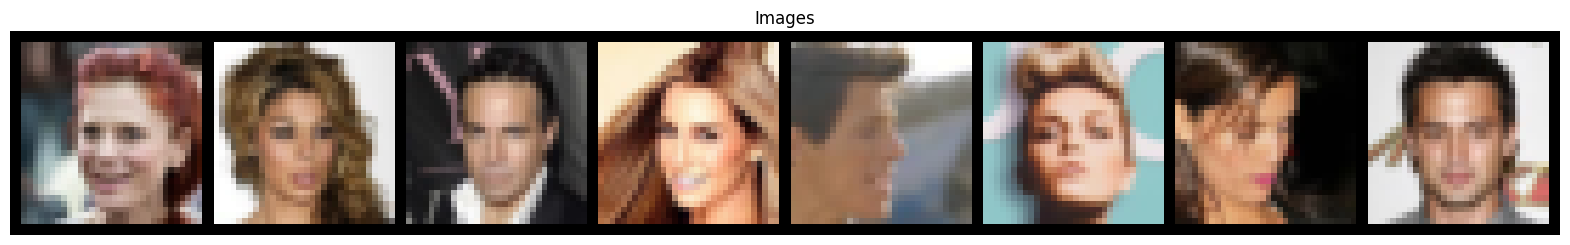

In [56]:
x = next(iter(dataset.train_dataloader()))[0]
show_imgs(x)